# Plotly Project 

In [2]:

import gc
import os
from pathlib import Path
import random
import sys

from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import scipy as sp


import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

# --- plotly ---
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_white"

# --- models ---
from sklearn import preprocessing
from sklearn.model_selection import KFold
import lightgbm as lgb
#import xgboost as xgb
#import catboost as cb

# --- setup ---
pd.set_option('max_columns', 50)

In [3]:
df=pd.read_excel('GH experiment Validation ROI (1).xlsx')

In [4]:

df.head()

,Type of validation,% of total experiments,ROI,Success Rate (%),Tools - Off the shelf (%),Data analysis (1-5),User interviews (1-5),Surveys (1-5),Field research (1-5),Competitor analysis (1-5),Tools (#),Integrations (#),Data points (#),Adjustments (#),Restarts (#),Creativity (1-5),Complexity (1-5),Level of testing (#)
0,A/B tests,0.43,2.2345,0.45,0.82,3,1,3,1,4,6,9,21,7,2,2,3,13
1,A/B/n tests,0.22,3.4678,0.57,0.88,3,1,3,2,5,11,4,37,5,4,4,4,11
2,Smoke testing,0.03,1.6645,0.62,0.77,1,5,5,5,4,4,5,56,12,15,5,5,4
3,Multivariate tests,0.12,2.2156,0.34,0.61,4,3,4,3,3,9,4,88,9,7,3,5,11
4,Percent experiments,0.11,0.8956,0.51,0.95,5,2,2,2,2,2,2,14,5,3,2,1,5


In [5]:
df.columns=['Type_of_validation','%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Adjustments(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)']

In [6]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)


,Data Type,Unique Values,Null Values,% null Values
Type_of_validation,object,7,0,0.000000
%of_total_experiments,float64,7,0,0.000000
ROI,float64,7,0,0.000000
Success_Rate_(%),float64,7,0,0.000000
Tools-Off_the_shelf(%),float64,6,0,0.000000
Data_analysis_(1-5),int64,4,0,0.000000
User_interviews(1-5),int64,4,0,0.000000
Surveys(1-5),int64,4,0,0.000000
Field_research_(1-5),int64,4,0,0.000000
Competitor_analysis(1-5),int64,4,0,0.000000


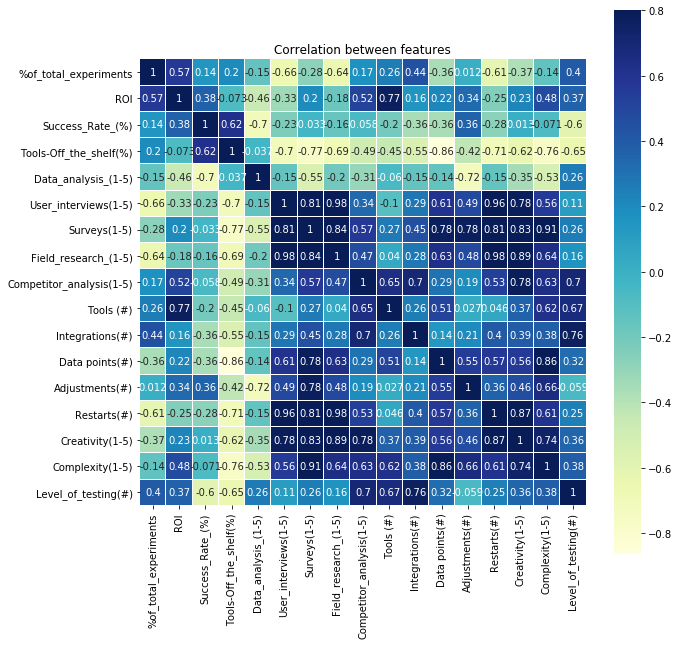

In [7]:
corr=df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

# Data Analysis

# %of_total_experiments

In [80]:
df9=df.drop(['Level_of_testing(#)','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Adjustments(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)'],axis=1)
sort = df9.sort_values('%of_total_experiments')
fig = px.bar(sort, x="Type_of_validation", y='%of_total_experiments',text='%of_total_experiments',
              title=" %of_total_experiments vs Type_of_validation ")
fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

# Level_of_testing(#)

In [39]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Adjustments(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)'],axis=1)
sort = df9.sort_values('Level_of_testing(#)')
fig = px.bar(sort, x="Type_of_validation", y='Level_of_testing(#)',text='Level_of_testing(#)',
              title="Level_of_testing(#) vsType_of_validation ")
fig.update_traces(marker_color='blue', showlegend=False)

fig.show()

# ROI

In [43]:
df9=df.drop(['%of_total_experiments','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('ROI')
fig = px.bar(sort, x="Type_of_validation", y='ROI',text='ROI',
              title=" 'ROI' vs Type of validation ")

fig.show()

# Complexity (1-5)

In [41]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Adjustments(#)','Restarts(#)','Creativity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Complexity(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='Complexity(1-5)',text='Complexity(1-5)',
            title="Complexity(1-5) vsType_of_validation ")
fig.update_traces(marker_color='yellow', showlegend=False)


fig.show()

# Creativity(1-5)

In [45]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Adjustments(#)','Restarts(#)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Creativity(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='Creativity(1-5)',text='Creativity(1-5)',
              title="'Creativity(1-5)' vs Type_of_validation ")
fig.update_traces(marker_color='red', showlegend=False)

fig.show()

# Restarts(#)

In [47]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Adjustments(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Restarts(#)')
fig = px.bar(sort, x="Type_of_validation", y='Restarts(#)',text='Restarts(#)',
              title=" Restarts(#) vs Type_of_validation ")

fig.show()

# Data points(#)

In [52]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Data points(#)')
fig = px.bar(sort, x="Type_of_validation", y='Data points(#)',text='Data points(#)',
              title=" Data points(#) vs Type of validation ")
fig.update_traces(marker_color='orange', showlegend=False)

fig.show()

# Adjustments(#)

In [58]:


df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Adjustments(#)')
fig = px.bar(sort, x="Type_of_validation", y='Adjustments(#)',text='Adjustments(#)',
              title=" 'Adjustments(#)' vs Type of validation ")

fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

In [ ]:

import pygame

black = (0,0,0)
white = (255,255,255)
blue = ("#7ec0ee")

blue = pygame.Color("#7ec0ee")
screen.fill(blue)

# Integrations(#)

In [77]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Integrations(#)')
fig = px.bar(sort, x="Type_of_validation", y='Integrations(#)',text='Integrations(#)',
              title=" Integrations(#) vs Type of validation ")

fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

# Tools (#)

In [75]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Tools (#)')
fig = px.bar(sort, x="Type_of_validation", y='Tools (#)',text='Tools (#)',
              title=" 'Tools (#)' vs Type of validation ")
fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

# Competitor_analysis(1-5)

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")
df['year'] = df['year'].astype(str) # to have categorical values
fig = px.bar(df, x='country', y='pop', color='year', barmode='group')
fig.update_traces(marker_color=['red', 'blue'], showlegend=False)
fig.show()


In [37]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Competitor_analysis(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='Competitor_analysis(1-5)', text='Competitor_analysis(1-5)',
             title=" 'Competitor_analysis(1-5)' vs Type of validation ")
fig.update_traces(marker_color='red', showlegend=False)

fig.show(color='red')



# Field_research_(1-5)

In [73]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Field_research_(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='Field_research_(1-5)',text='Field_research_(1-5)',
              title=" 'Field_research_(1-5)' vs Type of validation ")

fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

# Surveys(1-5)

In [31]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Surveys(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='Surveys(1-5)',
              title=" 'Surveys(1-5)' vs Type of validation ")

fig.show()

# User interviews(1-5)

In [71]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('User_interviews(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='User_interviews(1-5)',text='User_interviews(1-5)',
              title=" 'User_interviews(1-5)' vs Type of validation ")

fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

# 'Data_analysis_(1-5)'

In [69]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Tools-Off_the_shelf(%)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Data_analysis_(1-5)')
fig = px.bar(sort, x="Type_of_validation", y='Data_analysis_(1-5)',text='Data_analysis_(1-5)',
              title=" 'Data_analysis_(1-5)' vs Type of validation ")

fig.update_traces(marker_color='green', showlegend=False)
fig.show()

# Tools-Off_the_shelf(%)

In [62]:
df9=df.drop(['%of_total_experiments','ROI','Success_Rate_(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Tools-Off_the_shelf(%)')
fig = px.bar(sort, x="Type_of_validation", y='Tools-Off_the_shelf(%)',text='Tools-Off_the_shelf(%)',
              title=" 'Tools-Off_the_shelf(%)' vs Type of validation ")

fig.update_traces(marker_color='orange', showlegend=False)
fig.show()

# Success_Rate_(%)

In [60]:
df9=df.drop(['%of_total_experiments','ROI','Tools-Off_the_shelf(%)','Data_analysis_(1-5)','User_interviews(1-5)','Surveys(1-5)','Field_research_(1-5)','Competitor_analysis(1-5)','Tools (#)','Integrations(#)','Adjustments(#)','Data points(#)','Restarts(#)','Creativity(1-5)','Complexity(1-5)','Level_of_testing(#)'],axis=1)
sort = df9.sort_values('Success_Rate_(%)')
fig = px.bar(sort, x="Type_of_validation", y='Success_Rate_(%)',text='Success_Rate_(%)',
              title=" 'Success_Rate_(%)' vs Type of validation ")

fig.update_traces(marker_color='orange', showlegend=False)
fig.show()